# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
count_one = 1
set_one = 1

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


all_data = []

print('Beginning Data Retrieval \n-----------------------------------') 

for c in cities:

   # Build query URL

     query_url = f"{url}appid={weather_api_key}&units={units}&q=" + cities[1]   

    
     try:
       print(f'Processing Record {count_one} of Set {set_one} | {city}')
       query_url = f"{url}appid={weather_api_key}&units={units}&q=" + c    
       response = requests.get(query_url).json()
       city = c
       lat = response["coord"]['lat']
       lon = response["coord"]['lon']
       temp_max = response["main"]['temp_max']
       Humidity = response["main"]['humidity']
       Cloudiness = response["clouds"]['all']
       Wind_Speed = response["wind"]['speed']
       Country = response["sys"]['country']
       Date = response["dt"]
       #print(city, lat, lon, temp, Humidity, Cloudiness,Wind_Speed,Country, Date)
       all_data.append({"City":city, "Lat": lat, "Lng": lon, "Max Temp": temp_max, "Humidity":Humidity,\
                        "Cloudiness":Cloudiness , "Wind Speed": Wind_Speed ,"Country": Country, "Date": Date})
       count_one += 1

     except:
        print("City not found. Skipping...")
        
     if count_one == 50:
        set_one += 1
        count_one = 1
        time.sleep(10)
print('-----------------------------------\nData Retrival Complete\n-----------------------------------') 

Beginning Data Retrieval 
-----------------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | constantia
Processing Record 5 of Set 1 | akureyri
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | akrehamn
Processing Record 8 of Set 1 | saipan
Processing Record 9 of Set 1 | tsiombe
Processing Record 10 of Set 1 | delvada
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | east london
Processing Record 22 of Set 1 | adamstown
Processing Record 23 of Set 1 | pi

Processing Record 41 of Set 4 | lospalos
Processing Record 42 of Set 4 | ouricuri
Processing Record 43 of Set 4 | ust-tsilma
Processing Record 44 of Set 4 | tajerouine
Processing Record 45 of Set 4 | uchiza
Processing Record 46 of Set 4 | hammerfest
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | arauco
Processing Record 49 of Set 4 | iwanai
Processing Record 1 of Set 5 | iskateley
Processing Record 2 of Set 5 | soio
Processing Record 3 of Set 5 | saldanha
Processing Record 4 of Set 5 | novaya mayna
Processing Record 5 of Set 5 | padang
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | trindade
Processing Record 8 of Set 5 | sabang
Processing Record 9 of Set 5 | holualoa
Processing Record 10 of Set 5 | wafangdian
Processing Record 11 of Set 5 | kone
Processing Record 12 of Set 5 | vorgashor
Processing Record 13 of Set 5 | vinh
Processing Record 14 of Set 5 | enewetak
Processing Record 15 of Set 5 | san antonio oeste
Processing Record 16 of 

Processing Record 38 of Set 8 | richards bay
Processing Record 39 of Set 8 | luwuk
Processing Record 40 of Set 8 | cruzeiro do sul
Processing Record 41 of Set 8 | princeville
Processing Record 42 of Set 8 | kismayo
Processing Record 43 of Set 8 | prieska
Processing Record 44 of Set 8 | coquimbo
Processing Record 45 of Set 8 | pyay
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | dikwa
Processing Record 48 of Set 8 | belmonte
Processing Record 49 of Set 8 | zhangjiakou
Processing Record 1 of Set 9 | santiago de cao
Processing Record 2 of Set 9 | remire-montjoly
Processing Record 3 of Set 9 | barra da estiva
Processing Record 4 of Set 9 | taroudant
Processing Record 5 of Set 9 | copala
Processing Record 6 of Set 9 | labrador city
Processing Record 7 of Set 9 | uturoa
Processing Record 8 of Set 9 | tol'yatti
Processing Record 9 of Set 9 | taoudenni
Processing Record 10 of Set 9 | tofol
Processing Record 11 of Set 9 | ataq
City not found. Skipping...
Processing Recor

Processing Record 29 of Set 12 | impfondo
Processing Record 30 of Set 12 | bengkulu
City not found. Skipping...
Processing Record 30 of Set 12 | sonsorol village
Processing Record 31 of Set 12 | ladner
Processing Record 32 of Set 12 | puerto carreno
Processing Record 33 of Set 12 | sechura
Processing Record 34 of Set 12 | canutama
Processing Record 35 of Set 12 | den burg
Processing Record 36 of Set 12 | hobyo
Processing Record 37 of Set 12 | lethem
Processing Record 38 of Set 12 | pocone
City not found. Skipping...
Processing Record 38 of Set 12 | ahau
-----------------------------------
Data Retrival Complete
-----------------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame


weather_data_df = pd.DataFrame(all_data) 

# Show Record Count
weather_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,50.23,90,1,17.27,CL,1699497270
1,bilibino,68.0546,166.4372,3.16,94,100,2.68,RU,1699497142
2,constantia,44.1833,28.6500,47.08,57,99,18.84,RO,1699497270
3,akureyri,65.6835,-18.0878,39.13,75,100,12.66,IS,1699497270
4,whitehorse,60.7161,-135.0538,39.97,70,100,21.85,CA,1699497270


In [6]:
# Export the City_Data into a csv
weather_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
weather_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,50.23,90,1,17.27,CL,1699497270
1,bilibino,68.0546,166.4372,3.16,94,100,2.68,RU,1699497142
2,constantia,44.1833,28.6500,47.08,57,99,18.84,RO,1699497270
3,akureyri,65.6835,-18.0878,39.13,75,100,12.66,IS,1699497270
4,whitehorse,60.7161,-135.0538,39.97,70,100,21.85,CA,1699497270


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

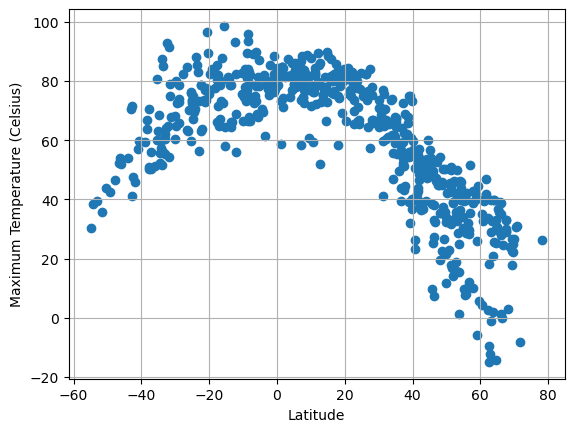

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
# plt.title("Temperature in World Cities")
plt.ylabel("Maximum Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

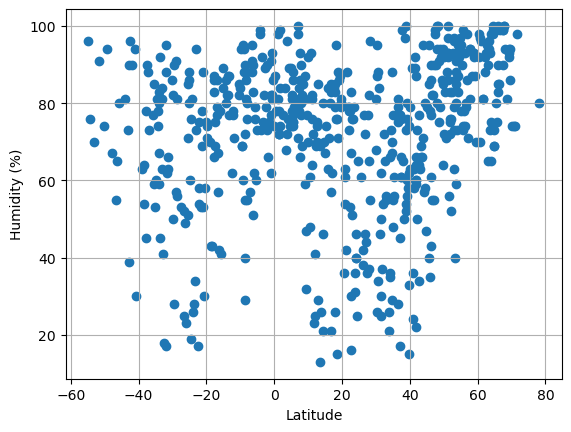

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

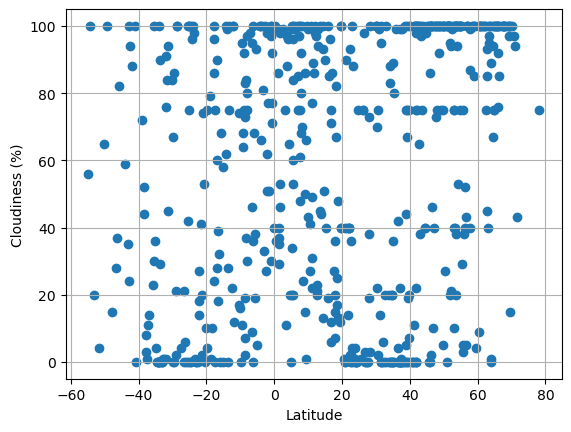

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

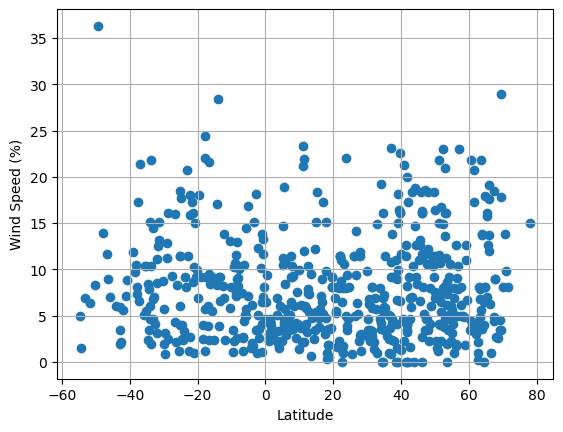

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
#def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    print(f"The r-value is: {rvalue**2}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [60]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern = weather_data_df.loc[weather_data_df["Lat"] >= 0]
northern["Hemisphere"] = "Northern Hemisphere"
northern_hemi_df = northern.set_index("Hemisphere")
# Display sample data
northern_hemi_df.head()

/var/folders/zt/x756b70j3v75355fl48s3dzc0000gn/T/ipykernel_44642/2271965462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern["Hemisphere"] = "Northern Hemisphere"


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Hemisphere,,,,,,,,,
Northern Hemisphere,bilibino,68.0546,166.4372,3.16,94,100,2.68,RU,1699497142
Northern Hemisphere,constantia,44.1833,28.6500,47.08,57,99,18.84,RO,1699497270
Northern Hemisphere,akureyri,65.6835,-18.0878,39.13,75,100,12.66,IS,1699497270
Northern Hemisphere,whitehorse,60.7161,-135.0538,39.97,70,100,21.85,CA,1699497270
Northern Hemisphere,akrehamn,59.2667,5.1833,44.42,87,100,12.66,NO,1699497272


In [61]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern = weather_data_df.loc[weather_data_df["Lat"] < 0]
southern["Hemisphere"] = "Southern Hemisphere"
southern_hemi_df = southern.set_index("Hemisphere")
# Display sample data
southern_hemi_df.head()

# Display sample data
southern_hemi_df.head()

/var/folders/zt/x756b70j3v75355fl48s3dzc0000gn/T/ipykernel_44642/4081705702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern["Hemisphere"] = "Southern Hemisphere"


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
Hemisphere,,,,,,,,,
Southern Hemisphere,lebu,-37.6167,-73.6500,50.23,90,1,17.27,CL,1699497270
Southern Hemisphere,tsiombe,-25.3000,45.4833,75.78,71,100,4.00,MG,1699497272
Southern Hemisphere,port-aux-francais,-49.3500,70.2167,42.53,94,100,36.31,TF,1699497274
Southern Hemisphere,grytviken,-54.2811,-36.5092,38.53,76,100,1.50,GS,1699497274
Southern Hemisphere,avarua,-21.2078,-159.7750,77.05,69,20,16.11,CK,1699497274


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7495254489815697


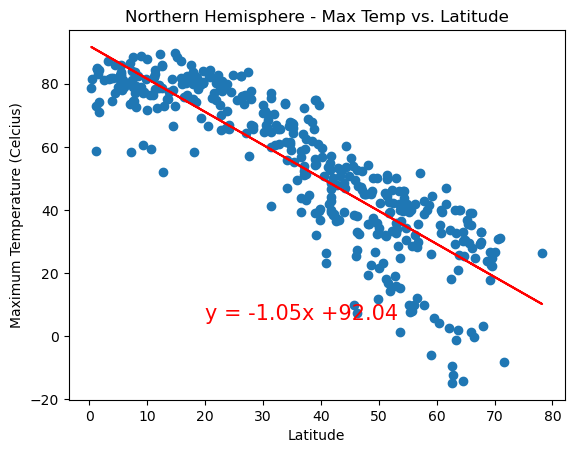

In [62]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
#equation = plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
#annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Celcius)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.4332885676648683


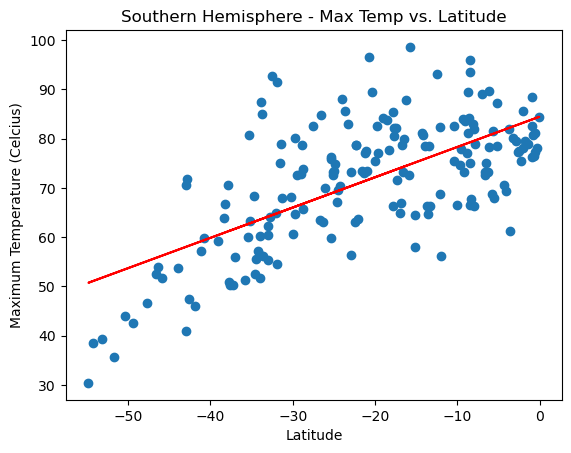

In [63]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (Celcius)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature. There is a weak positive correlation between latitude and maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07563169225079272


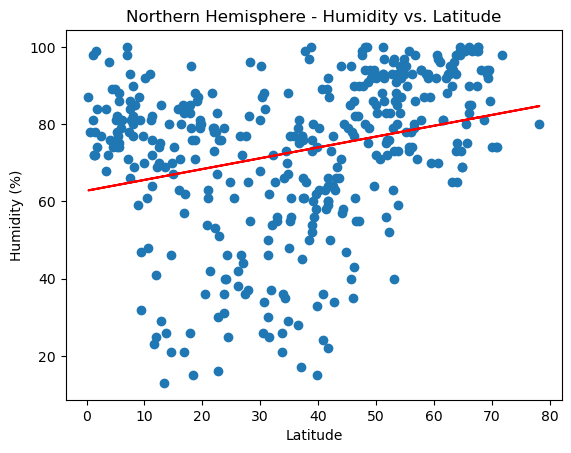

In [64]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.021816241149994458


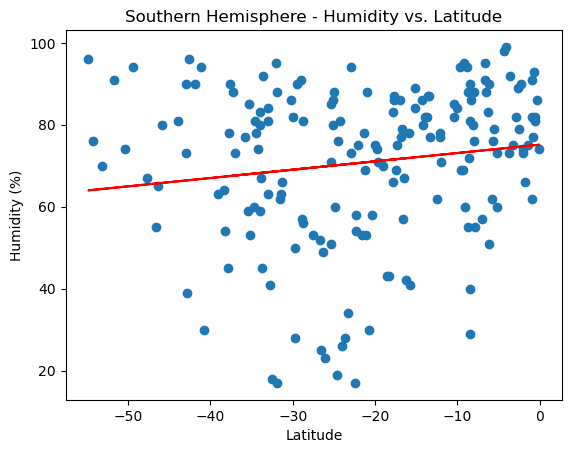

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between latitude and humidity for both northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05400736443901917


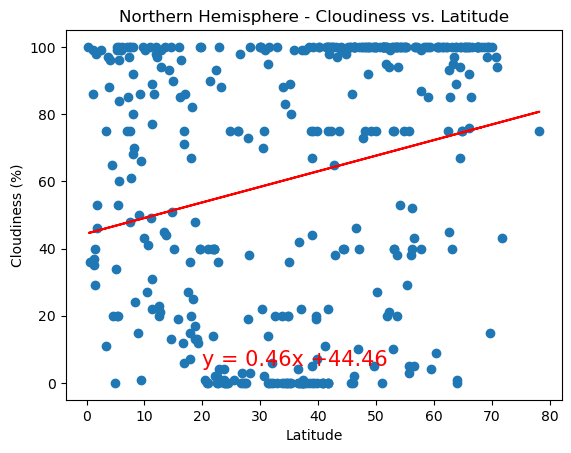

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.040520550560160754


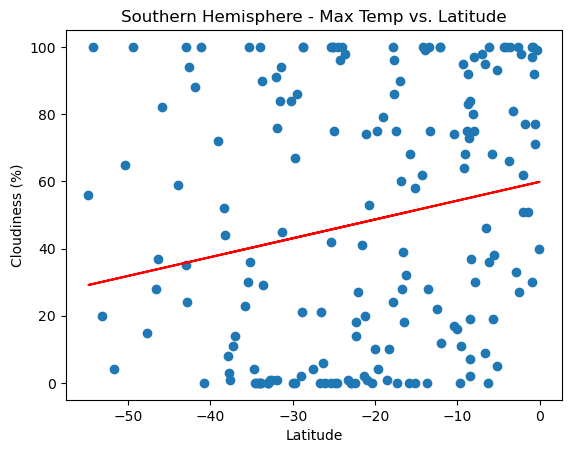

In [67]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between cloudiness and latitude in both Northern and Souther hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0370662905310614


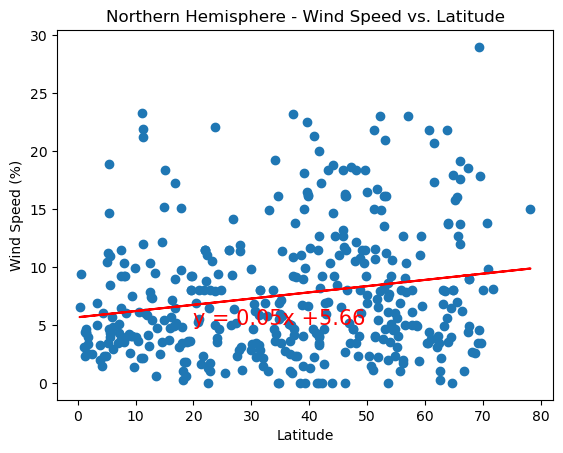

In [68]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.005700467384735926


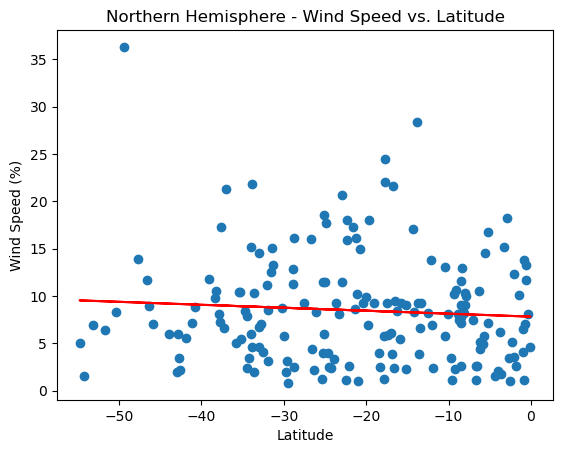

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation bewtween latitude and wind speed in both northern and southern hemispheres.